In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# Need dataset in a different encoding
df = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
#check structure of dataset
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [5]:
df.shape

(953, 24)

In [6]:
#checking for null values
df.isna().sum

<bound method DataFrame.sum of      track_name  artist(s)_name  artist_count  released_year  released_month  \
0         False           False         False          False           False   
1         False           False         False          False           False   
2         False           False         False          False           False   
3         False           False         False          False           False   
4         False           False         False          False           False   
..          ...             ...           ...            ...             ...   
948       False           False         False          False           False   
949       False           False         False          False           False   
950       False           False         False          False           False   
951       False           False         False          False           False   
952       False           False         False          False           False   

     rel

In [7]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [8]:
#get basic stats of the data

df_stats = df.describe()

df_stats

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [9]:
#Most popular Keys for songs
top_keys = df['key'].value_counts().head(5)
top_keys

key
C#    120
G      96
G#     91
F      89
B      81
Name: count, dtype: int64

In [10]:
key = df['key']
mode= df['mode']

key_mode = key + mode
top_key_mode = key_mode.value_counts().head(5)
top_key_mode

C#Major    73
GMajor     66
DMajor     66
G#Major    63
C#Minor    47
Name: count, dtype: int64

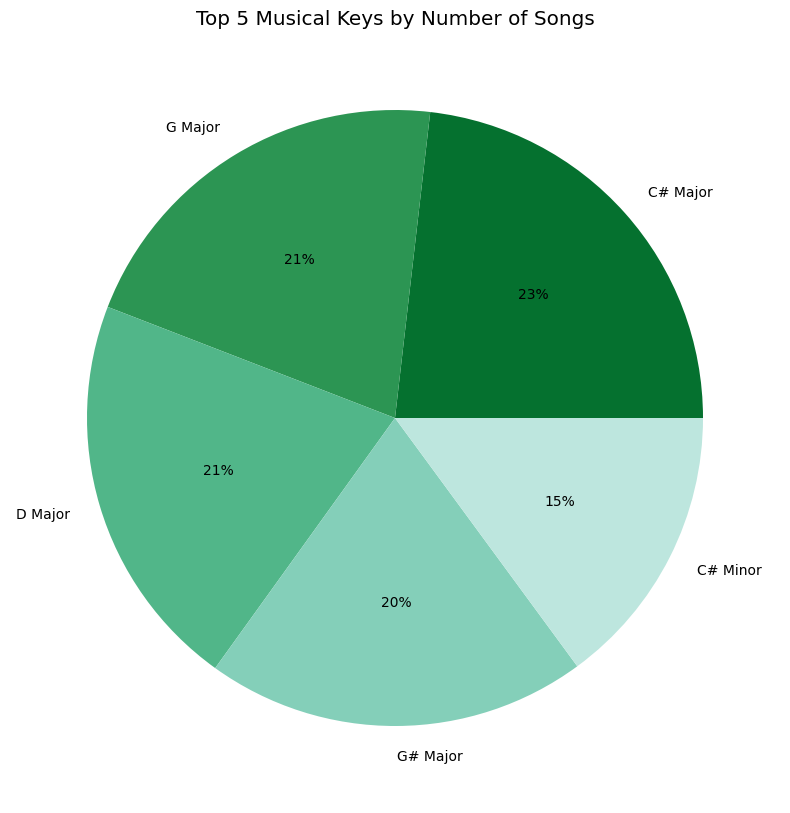

In [11]:
labels = ['C# Major','G Major','D Major','G# Major','C# Minor']
palette_color = sns.color_palette('BuGn_r')

plt.figure(figsize=(10, 10))
plt.pie(top_key_mode, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title('Top 5 Musical Keys by Number of Songs')
plt.show()

Between the top five musical keys and modes represented in the data, there are not hugely significant differences in percentage. We would still advise the client to use one of these five keys, but choosing between them may be a less important detail.

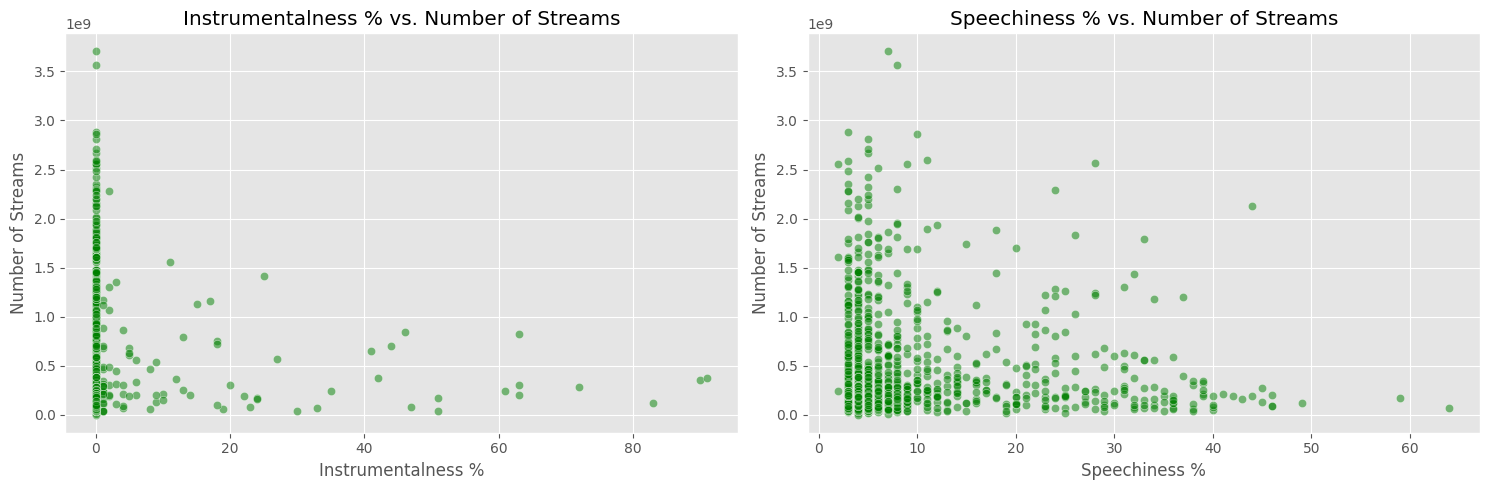

In [12]:
# We want to convert all useable streams data to integers before we add it to our chart
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Now we analyze the instrumentalness vs speechiness of songs
instrumentality = ['instrumentalness_%', 'speechiness_%']
stream_count = 'streams'

plt.figure(figsize=(15, 5))
for idx, feature in enumerate(instrumentality, start=1):
    plt.subplot(1, 2, idx)
    sns.scatterplot(x=df[feature], y=df[stream_count], color='green', alpha=0.5)
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Number of Streams')
    plt.title(f'{feature.replace("_", " ").title()} vs. Number of Streams')

plt.tight_layout()
plt.show()

As seen in the statistics of the data that we showed earlier, there is an inverse correlation between instrumentalness and streams as well as speechiness and streams. This will play into the answer we present the client later

Danceabilty, energy, instrumentalness, and speechiness seem to be the most clearly defined of the percentage-based stats we are given, so let's compare them in one graph.

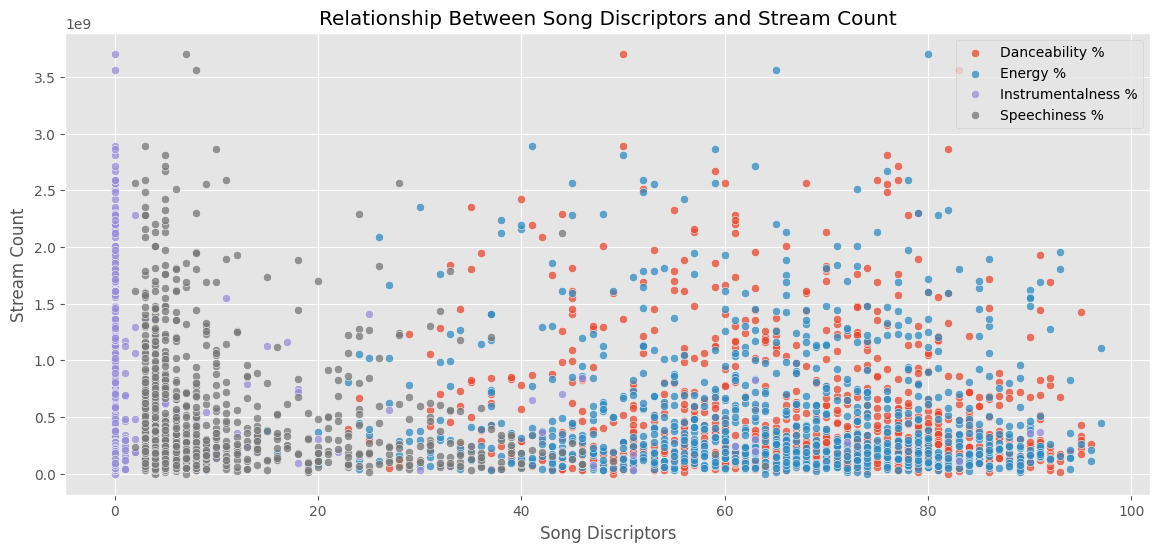

In [13]:
#select columns for song qualities
song_descriptors = ['danceability_%', 'energy_%', 'instrumentalness_%','speechiness_%']


#create scatter plots
plt.figure(figsize=(14, 6))
for feature in song_descriptors:
    sns.scatterplot(data=df, x=feature, y=stream_count, alpha=0.75, label=feature.replace('_', ' ').title())

plt.xlabel('Song Discriptors')
plt.ylabel('Stream Count')
plt.title('Relationship Between Song Discriptors and Stream Count')
plt.legend()
plt.show()

This graph more clearly shows us that what we are looking for is something high in danceability and energy and low in instrumentalness and speechiness. Next we weill look at the relationship between bpm and streams.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


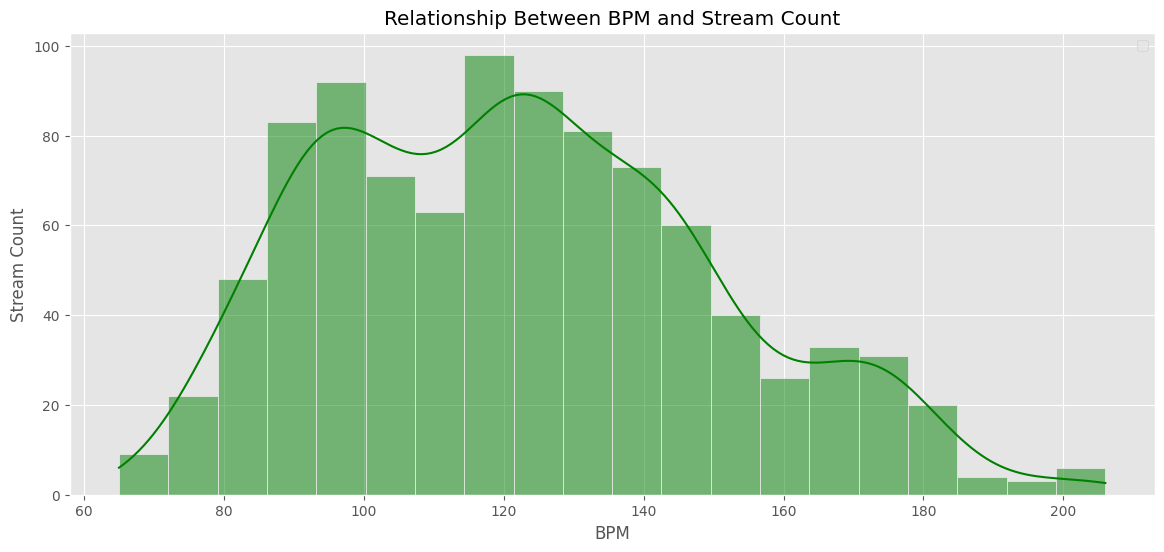

In [14]:
bpm = ['bpm']
plt.figure(figsize=(14, 6))
sns.histplot(df['bpm'], bins=20, kde=True, color='green')

plt.xlabel('BPM')
plt.ylabel('Stream Count')
plt.title('Relationship Between BPM and Stream Count')
plt.legend()
plt.show()


This graph shows us that around 120 BPM is the most represented in the dataset, meaning that that is the target for our client's task.

Now we have enough data to advise our client. In order to write a song that will garner a high amount of streams on Spotify, our client should write a song that fulfills the folowing:

1. The song is around 120 BPM
2. The song is in one of the following keys: 'C# Major','G Major','D Major','G# Major','C# Minor'
3. The song is written in a way that emphasizes danceability and energy (the client should consider what genre to write in and how their style may affect those factors).

Note: genre data is not available from this dataset, so the client will have to make decisions regarding genre without specific input from us.